## 시각화

### matplotlib
- matploblib는 주로 2D 그래프를 위한 데스크톱 패키지.
- 모든 운영체제의 다양한 GUI 백엔드를 지원하고 있으며, PDF, SVG, JPG, PNG, BM, GIF 등 일반저긍로 널리 사용되는 벡터 포맷과 래스터 포맷으로 그래프 저장이 가능하다.

##  figure
- matplotlib에서 그래프는 Figure 객체 내에 존재한다.
- 그래프를 위한 새로운 figure는 plt.figure를 사용해서 생성 이 가능하다
- plt.figure에는 다양한 옵션이 있으며, 그 중 figsize는 파일에 저장할 경우를 위해 만드려는 figure의 크기와 비율 조정 가능

## subplot - 서브플롯
- 서브플롯은 add_subplot을 사용해서 하나 이상의 subplots 생성 필요.
- **fig.add_subplot에서는 AxesSubplot이란 객체를 반환하고 이는 인스턴스 메서드를 호출해서 다른 빈 서브플롯에 직접 그래프를 그릴 수 있다.**
- **명령으로 그래프를 띄우면 matplotlib는 가장 최근의 figure와 그 서브플롯을 그린다**

- pyplot.subplots 옵션 (nrows, ncols, sharex, sharey, subplot_kw, **fig_kw)
    - 로우 수, 컬럼 수,
    - sharex, sharey = xlim 값 일치시키기, ylim 값일치시키기 => True, False
    - fig_kw = 추가적인 키워드 인자 => ex) figsize=(8,6)    
   
- matplotlib는 전체 그래프의 높이와 너비에 따라서 간격과 여백을 상대적으로 알아서 결정해준다.
    - 서브플롯의 간격을 Figure객체의 subplots_adjust 메서드로 바꿀수 있음.
    - subplots_adjust( left, bottom, right, top, wspace, hspace)
    - wspace, hsapce => 너비간격, 높이간격   

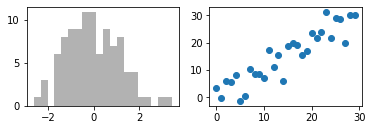

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# figure 객체 생성
# facecolor, edgecolor = 서브플롯 바깥 배경 색상, 그래프 색상
fig1 = plt.figure() # figure(num, figsize, dpi, facecolor, edgecolor, frameon, FigureClass, clear, **kwargs)

# 4개의 subplot 생성 / add_subplot 
ax1 = fig1.add_subplot(2,2,1) # nrows, ncols, index, **kwargs
ax2 = fig1.add_subplot(2,2,2) # nrows, ncols, index, **kwargs

_ = ax1.hist(np.random.randn(100),bins=20, color='k', alpha=0.3) # hist( x, bins, color, range, density, weight, label, stacked, log, align histtype 등등)
_ = ax2.scatter(np.arange(30), np.arange(30) + 3*np.random.randn(30)) # scatter (x, y, s, c, ,marker ... )


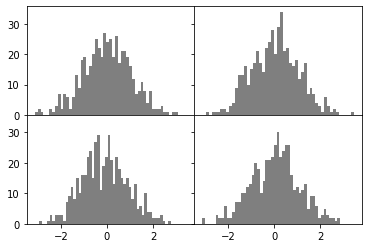

In [48]:
# subplot 2 -> subplots_adjust 옵션

fig2, axes = plt.subplots(2,2, sharex=True, sharey = True)

# 간격 0, 0 으로 설정
plt.subplots_adjust(wspace=0, hspace=0)

for i in range(2):
    for j in range(2):
        _ = axes[i,j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)

        


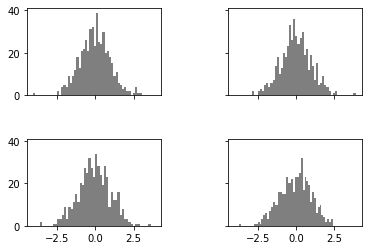

In [50]:
# subplot 생성
fig2, axes2 = plt.subplots(2,2, sharex=True, sharey = True)

# 간격 조절
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i in range(2):
    for j in range(2):
        _ = axes2[i,j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)

## 색상, 마커 , 선 스타일
- matplotlib에서 가장 중요한 plot 함수는 x와 y좌표갓이 담긴 배열과 추가적으로 색상과 선스타일을 나타내는 축약 문자열을 인자로 받음

- plot(x, y, 축약 문자열)
![matpltlib_color](imgs/matplotlib_color.PNG)
![matpltlib_marker](imgs/matplotlib_marker.PNG)
![matpltlib_style](imgs/matplotlib_style.PNG)

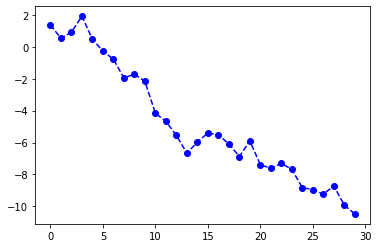

In [55]:
# 색상, 마커, 선 스타일

# 색상, 선스타일, 마커
plt.plot(np.random.randn(30).cumsum(), color='b', linestyle='dashed', marker='o')

## 눈금, 라벨, 범례
- (1) pyplot 인터페이스를 사용해서 순차적으로 꾸미는 방법
- (2) matplotlib의 API 사용한 객체지향적인 방법
- 함수 : xlim, xticks, xticklabels 메서드 사용.

### 범례
- 까다로운 사람이 아니라면 최대한 방해가 되지 않는 곳에 두는 'best' 옵션만으로 충분
- 범례에서 제외하고 싶은 요소가 있다면 label 인자를 넘기지 않거나 label='nolegend_'옵션 사용

Text(0.5, 1.0, 'My First matplotlib plot')

Text(0.5, 0, 'Stages')

Text(0, 0.5, 'Score')

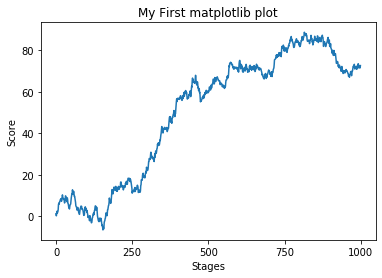

In [76]:
# 눈금 - xticks

fig4 = plt.figure()
ax = fig4.add_subplot(1,1,1)

ax.plot(np.random.randn(1000).cumsum())

# set ticks 메서드는 전체 데이터 범위를 따라 눈금을 어디에 배치할지 지정
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

#labels = ax.set_xticklabels(['one', 'two',' three', 'four', 'five'], 
#                           rotation=30, fontsize='small')
ax.set_title('My First matplotlib plot')
ax.set_xlabel('Stages')
ax.set_ylabel('Score')

Text(0.5, 1.0, 'My First matplotlib plot')

Text(0.5, 0, 'Stages')

Text(0, 0.5, 'Score')

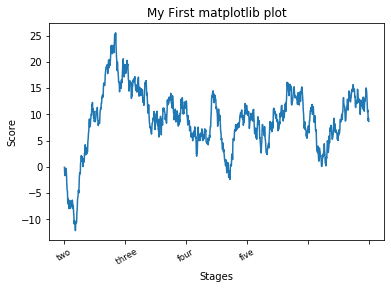

In [82]:
# 눈금 조절 - xticklabels

fig7 = plt.figure()
ax7 = fig7.add_subplot(1,1,1)

ax7.plot(np.random.randn(1000).cumsum())

# set ticks 메서드는 전체 데이터 범위를 따라 눈금을 어디에 배치할지 지정
labels = ax7.set_xticklabels(['one', 'two',' three', 'four', 'five'], 
                           rotation=30, fontsize='small')
ax7.set_title('My First matplotlib plot')
ax7.set_xlabel('Stages')
ax7.set_ylabel('Score')

(0, 1000)

(-100, 100)

Text(0.5, 1.0, 'My First matplotlib plot')

Text(0.5, 0, 'Stages')

Text(0, 0.5, 'Score')

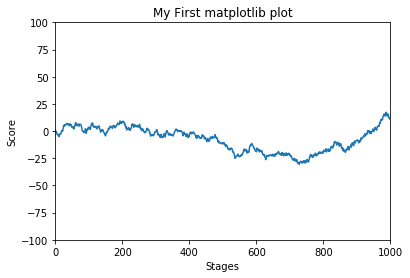

In [83]:
#  눈금 한계 조절 - xlim, ylim

fig8 = plt.figure()
ax8 = fig8.add_subplot(1,1,1)

ax8.plot(np.random.randn(1000).cumsum())

# set ticks 메서드는 전체 데이터 범위를 따라 눈금을 어디에 배치할지 지정
ax8.set_xlim([0, 1000]) # 끝과 시작 지정
ax8.set_ylim([-100,100]) # 끝과 시작 지정

ax8.set_title('My First matplotlib plot')
ax8.set_xlabel('Stages')
ax8.set_ylabel('Score')

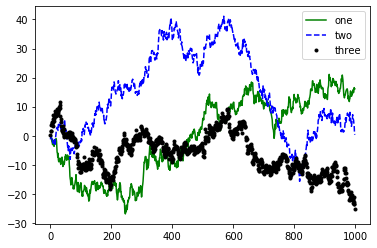

In [70]:
fig5 = plt.figure()
ax2 = fig5.add_subplot(1,1,1)

ax2.plot(np.random.randn(1000).cumsum(), 'g', label='one')
ax2.plot(np.random.randn(1000).cumsum(), 'b--', label='two')
ax2.plot(np.random.randn(1000).cumsum(), 'k.', label='three')

# 범례 - best 옵션
ax2.legend(loc='best') 

## Series 형 plot()
    - label : 그래프의 범례 이름
    - ax : 그래프를 그릴 matplotlib의 서브플롯 객체, 만약 아무것도 넘어오지 않으면 현재 활성화되어 있는 matplotlib의 서브플롯을 사용한다.
    - style : 'ko--' 같은 스타일 문자열
    - alpha : 그래프 투명도 (0~1)
    - kind : 그래프 종류 (area, bar, barh, density, hist, kde, line, pie
    - logy : y축에 대한 로그 스케일링
    - use_index : 객체의 색인을 눈금 이름으로 사용할지 여부
    - rot : 눈금 이름을 회전 (0~360)
    - xticks, yticks : x축, y축으로 사용할 값
    - xlim, ylim : x축 한계, y축 한계
    - grid : 축의 그리드를 표시할지 여부   
   
## DataFrame 형 plot()
    - subplots : 각 데이터 프레임 컬럼을 독립된 서브플롯에 그리기
    - sharex : subplots=True인 경우 x축 공유 및 눈금과 한계 연결
    - sharey : subplots=True인 경우 y축 공유 및 눈금과 한계 연결
    - figsize : 생성될 그래프의 크기 
    - title : 그래프 제목 문자열지정
    - legend : 범례
    - sort_columns : 컬럼을 알파벳 순서로 그림    

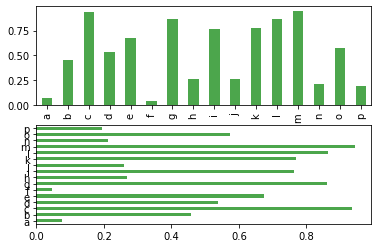

In [87]:
# (1) 막대그래프 - bar plot / barh plot
import pandas as pd

fig, axes = plt.subplots(2,1)

data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax = axes[0], color='g', alpha=0.7)
data.plot.barh(ax = axes[1], color='g', alpha=0.7)

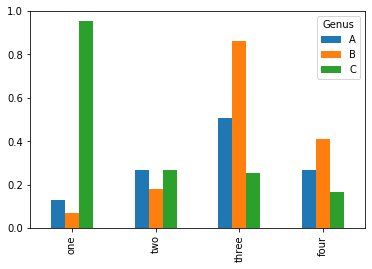

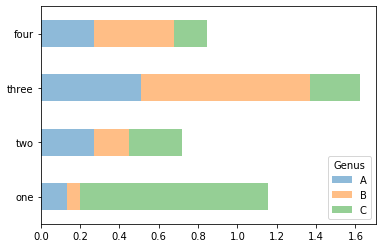

In [92]:
df = pd.DataFrame(np.random.rand(4,3), index=['one','two','three','four'],
                  columns = pd.Index(['A','B','C'], name='Genus'))

df.plot.bar()

df.plot.barh(stacked=True, alpha=0.5)

## Pandas 에서 seaborn 그래프 그리기
- matplotlib 는 조금 저수준의 라이브러리이다. 직접 범례, 제목, 라벨, 주석 등등 기본 컴포넌트들 그래프 작성 해야함.
- sns.set(style="whitegrid") # 자동으로 기본 색상 팔레트 ,그래프 배경, 그리드 선 색상 같은 꾸밈새 변경
- hue 옵션 추가시 추가 분류에 따라 나눠 그릴 수 있다.

- https://seaborn.pydata.org/api.html // Seaborn API
- https://seaborn.pydata.org/generated/seaborn.barplot.html // barplot 그래프

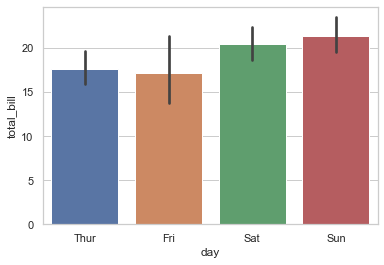

In [95]:
# (1) Seaborn Bar graph
# seaborn 패키지를 이용하여 훨씬 간단하게 철 가능
import seaborn as sns
tips = sns.load_dataset("tips")

# 자동으로 기본 색상 팔레트 ,그래프 배경, 그리드 선 색상 같은 꾸밈새 변경
sns.set(style="whitegrid")

ax = sns.barplot(x="day", y="total_bill", data=tips)

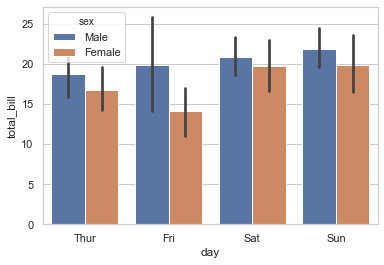

In [96]:
# hue 옵션 추가시 추가 분류에 따라 나눠 그릴 수 있다.
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

## 히스토그램 그래프, 밀도 그래프, distplot 그래프
- distplot = 히스토그램 + 밀도

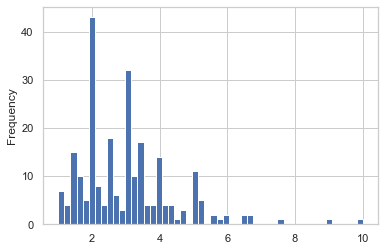

In [99]:
# (2) 히스토그램과 밀도 그래프
tips['tip'].plot.hist(bins=50)

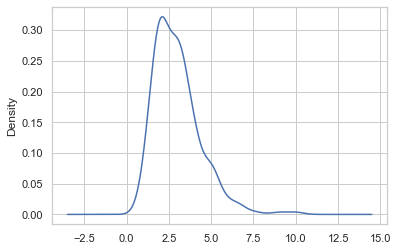

In [102]:
# 밀도 그래프
tips['tip'].plot.density()

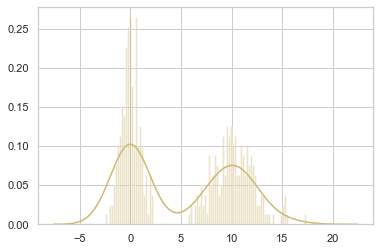

In [105]:
# distplot 메서드는 히스토그램그래프와 밀도그래프를 한번에 그려줌
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))

sns.distplot(values,  bins=100, color='y')

## 산포도 (scatter plot, point plot)
- 두 개의 1차원 데이터 묶음 간의 관계를 나타내고자 할 때 유용한 그래프.
- **변수 그룹간의 모든 산포도를 살펴보는 일이 매우 유용**
- **pairplot을 이용하여 각 변수에 대한 히스토그램이나 밀도 그래프도 생성 가능**

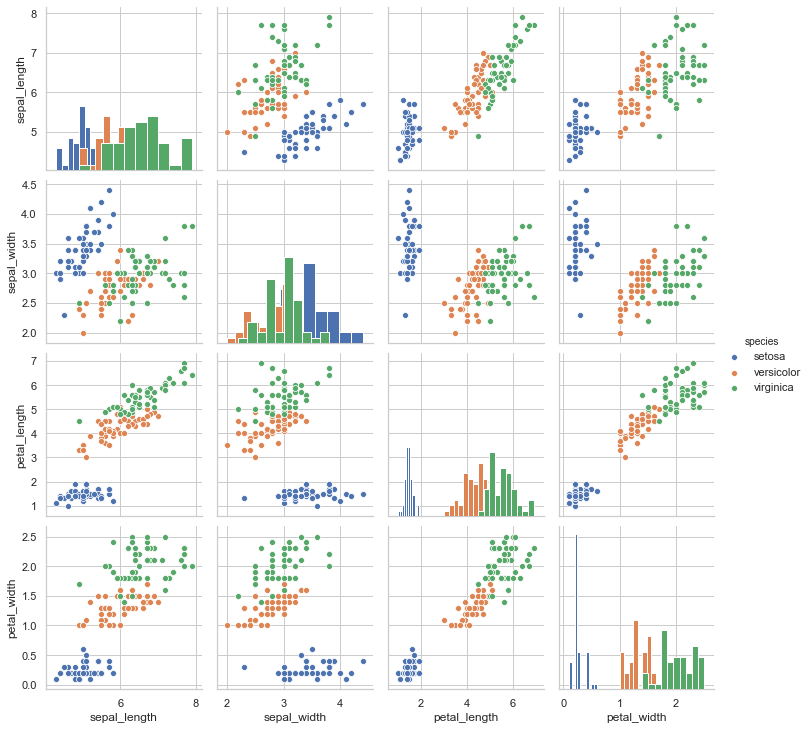

In [111]:
iris = sns.load_dataset('iris')

# histogram 형태로
sns.pairplot(iris, diag_kind='hist', hue = 'species') 
plt.show()


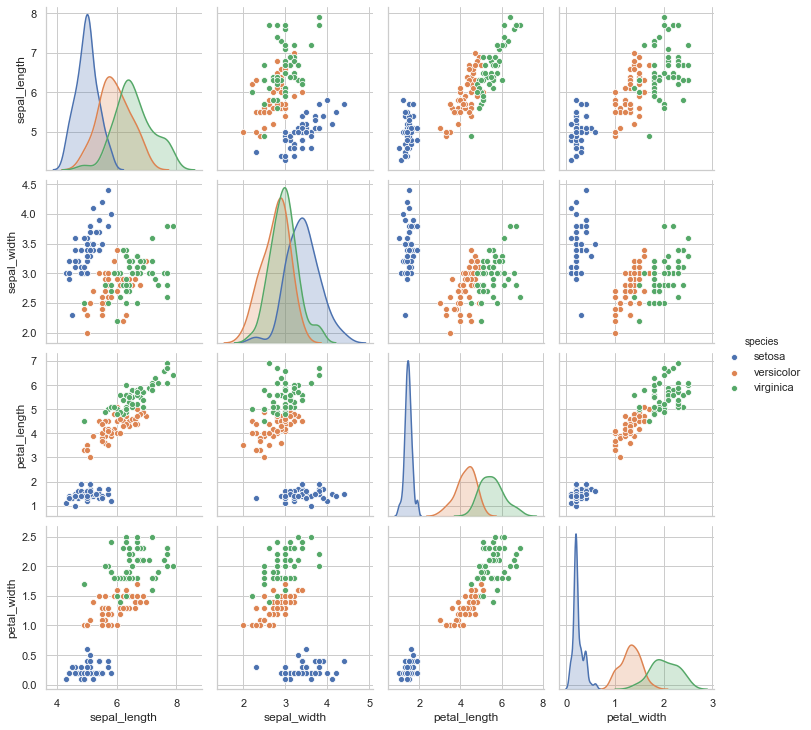

In [110]:
# 밀도 그래프로 / hue 설정시 알아서 색 다르게.
sns.pairplot(iris, diag_kind='kde', hue = 'species') 
plt.show()

## 패싯 그리드와 범주형 데이터
- 다양한 범주형 값을 가지는 데이터를 시각화하는 한 가지 방법은 패싯 그리드를 이용하는 것 (factorplot) 함수 이용

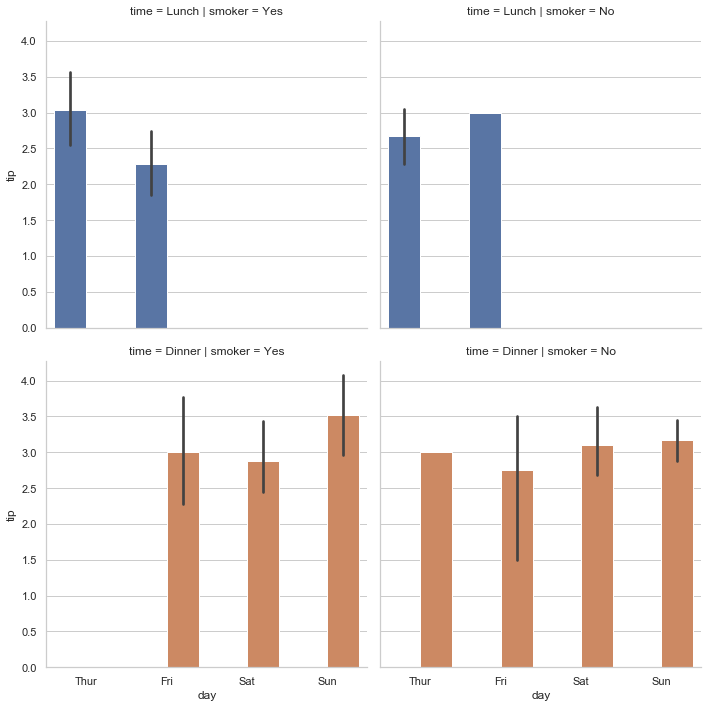

In [116]:
sns.factorplot(x='day', y='tip', hue='time',
               row='time', col='smoker', kind='bar', data=tips)`

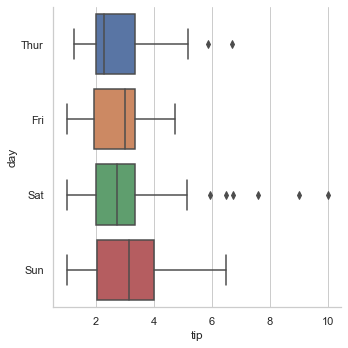

In [118]:
sns.factorplot(x='tip', y='day', kind='box', data=tips)